<a href="https://colab.research.google.com/github/pkang0831/python_import_lesson/blob/gh-pages/Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Exploratory Data Analysis (EDA)**

EDA is a very important step of data analysis where the known characteristics of a features or relationships among features are verified, confrimed and re - validated. 

Noticing relationship without having any background knowledge of a field is very difficult situation for data scientists. therefore, it is important to first explore what is the field that he or she is dealing with, hold frequent knowledge sharing sessions and have sufficient technical conversations with on-site professionals who are on active-duty. 

However, it is important to note that such effort has potential of actually ruining the progress of data analysis by unconciously introducing pre-conceived bias that was affected by professionals. Remember, data scientists should be approaching the dataset without any bias, and it is VERY difficult to do so. Human brain is designed to think when they perceive information via eyes, ears, nose, skin and tongue. and that thinking process itself is already a sophisticated machine learning modelling process that happens instantly; in which its model, so called "opinion", can unconciously introduce bias when EDA is being performed.

Only approach the features with plain facts. It is okay to disregard the beliefs. You, as a data scientist, will "verify, confirm and re-validate" or debunk those foundations. 

This module will start by importing the dataset from previous module, and attempt to perform EDA without any pre-conceived knowledge or bias.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv')
df.shape

(201, 29)

In [ ]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
# lets drop non-numeric data for numeric data. check the data type manually by using .head()
# except for 'make','aspiration','num-of-doors','body-style','drive-wheel','engine-location','engine-type',num-of-cylinders','fuel-system','horsepower-binned'
string_columns = ['make','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system','horsepower-binned']
for col in df.columns.drop(string_columns):
  df[col] = df[col].apply(pd.to_numeric,errors='coerce')
df = df.dropna(subset=df.columns,axis=0)
df.shape

(196, 29)

In [ ]:
# 5 data point was dropped
df.dtypes
for col in df.columns:
  if col in string_columns:
    continue
  df[col] = df[col].astype('float')

In [ ]:
df.dtypes

symboling            float64
normalized-losses    float64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel               float64
gas                  float64
dtype: object

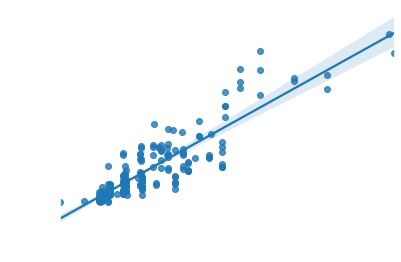

In [ ]:
with plt.rc_context({
    'axes.edgecolor':'white', 
    'xtick.color':'white', 
    'ytick.color':'white'
}):
  sns.regplot(x='engine-size',y='price',data=df)
  plt.ylim(0,)
  plt.xlabel('engine-size',fontdict={'color':'white'})
  plt.ylabel('price',fontdict={'color':'white'})

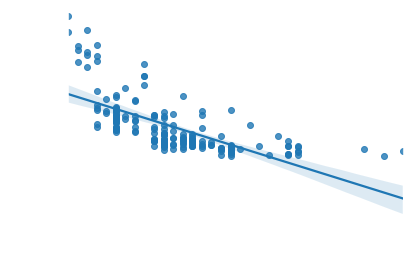

In [ ]:
with plt.rc_context({
    'axes.edgecolor':'white',
    'xtick.color':'white',
    'ytick.color':'white'
}):
  sns.regplot(x='city-mpg',y='price',data=df)
  plt.xlabel('city-mpg',fontdict={"color":"white"})
  plt.ylabel('price',fontdict={"color":"white"})

In [ ]:
# Correlation matrix
df[['city-mpg','engine-size','price']].corr()

,city-mpg,engine-size,price
city-mpg,1.000000,-0.712693,-0.692550
engine-size,-0.712693,1.000000,0.889265
price,-0.692550,0.889265,1.000000
